In [5]:
# importing the libraries

In [2]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


In [15]:
df = pd.read_csv("Telco_Customer.csv")
df.head()

,customerID,gender,SeniorCitizen,Dependents,tenure,PhoneService,InternetService,DeviceProtection,TechSupport,CableService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,No,1,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,34,Yes,Yes,Yes,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,2,Yes,Yes,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,45,No,Yes,Yes,Yes,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,2,Yes,Yes,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [17]:
# Show all the number of column and rowsof dataframe

In [18]:
df.shape

(7043, 16)

In [19]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Dependents', 'tenure',
       'PhoneService', 'InternetService', 'DeviceProtection',
       'TechSupport', 'CableService', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype=object)

In [11]:
# Checking for missing values(na valus)

In [20]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Dependents          0
tenure              0
PhoneService        0
InternetService     0
DeviceProtection    0
TechSupport         0
CableService        0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [21]:
 # show some Statistics 

In [22]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [15]:
# To know customer churn count

In [23]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [24]:
# Visualise the count of churn customer

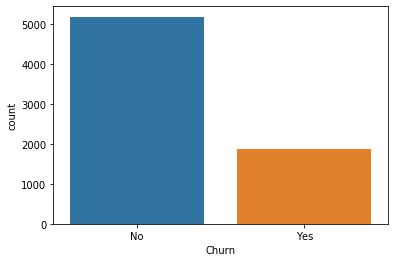

In [18]:
sns.countplot(df['Churn'])

In [25]:
# Percentage of customer leaving?
num_stay =df[df.Churn == 'No'].shape[0]
num_churn =df[df.Churn == 'Yes'].shape[0]

#Percentage of customer that stay with the company

print(num_stay/(num_stay + num_churn) *100,'Percentage of customer stay with the company')

#Percentage of customer that Left with the company

print(num_churn/(num_stay + num_churn) *100,'Percentage of customer stay with the company')

73.4630129206304 Percentage of customer stay with the company
26.536987079369588 Percentage of customer stay with the company


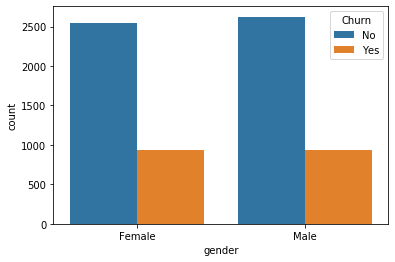

In [20]:
# Churned count for male and female
sns.countplot(x='gender', hue='Churn',data=df)

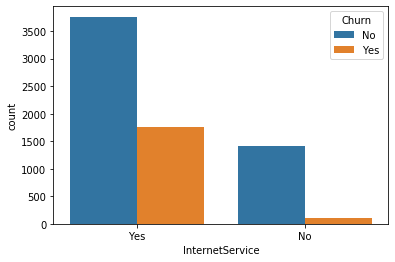

In [26]:
# churn count for internate service
sns.countplot(x='InternetService', hue='Churn',data=df)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020F69E4F788>,
      dtype=object)

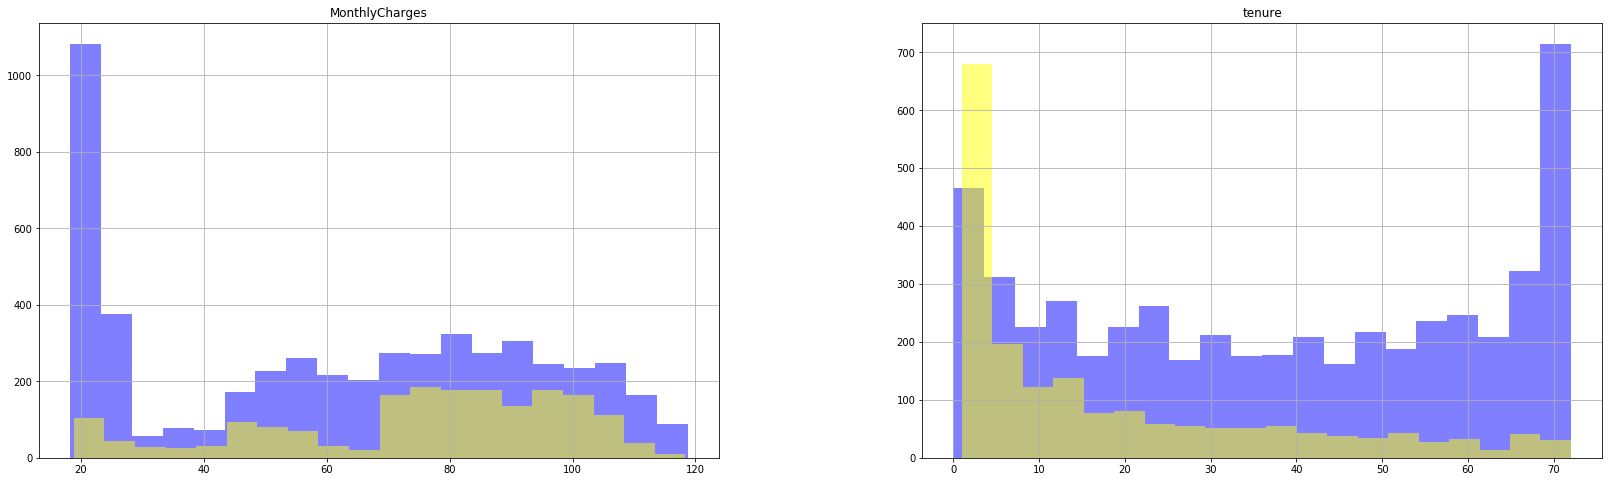

In [27]:
numerical_feature= ['tenure','MonthlyCharges']
fig, ax= plt.subplots(1,2, figsize=(28,8))
df[df.Churn == 'No'][numerical_feature].hist(bins=20, color='blue', alpha=0.5, ax=ax)

df[df.Churn == 'Yes'][numerical_feature].hist(bins=20, color='yellow', alpha=0.5, ax=ax)

In [28]:
#Remove Unncessary column

In [29]:
clean_df= df.drop('customerID', axis=1)

In [30]:
# look at the number and row of dataset

In [31]:
clean_df.shape

(7043, 15)

In [32]:
# converting non numeric cloumn to numeric column
for column in clean_df.columns:
    if clean_df[column].dtype== np.number:
        continue
    clean_df[column]=LabelEncoder().fit_transform(clean_df[column])

In [28]:
#show new data sets
clean_df.dtypes

gender                int32
SeniorCitizen         int64
Dependents            int32
tenure                int64
PhoneService          int32
InternetService       int32
DeviceProtection      int32
TechSupport           int32
CableService          int32
Contract              int32
PaperlessBilling      int32
PaymentMethod         int32
MonthlyCharges      float64
TotalCharges          int32
Churn                 int32
dtype: object

In [33]:
# Show first five row of data set
clean_df.head()

,gender,SeniorCitizen,Dependents,tenure,PhoneService,InternetService,DeviceProtection,TechSupport,CableService,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,1,0,0,0,0,1,2,29.85,2505,0
1,1,0,0,34,1,1,1,0,0,1,0,3,56.95,1466,0
2,1,0,0,2,1,1,0,0,0,0,1,3,53.85,157,1
3,1,0,0,45,0,1,1,1,0,1,0,0,42.30,1400,0
4,0,0,0,2,1,1,0,0,0,0,1,2,70.70,925,1


In [34]:
# Scaled the data
X= clean_df.drop('Churn',axis=1)  # feature data set
y= clean_df['Churn']

In [35]:
X= StandardScaler().fit_transform(X)

In [36]:
# Split the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)


# Gradient boost Classifier

In [37]:

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

In [38]:
skfold=StratifiedKFold(n_splits=10)

In [39]:
# implementing gradiat boost classifier
from sklearn.ensemble import GradientBoostingClassifier
gb_clf=GradientBoostingClassifier(random_state=42)

In [71]:
for train_index,test_index in skfold.split(X,y):
    clone_clf=clone(gb_clf)
    x_train_folds=X[train_index]
    y_train_folds=y[train_index]
    x_test_fold=X[test_index]
    y_test_fold=y[test_index]
    clone_clf.fit( x_train_folds,y_train_folds)
    y_pred=clone_clf.predict(x_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print("The result of Gradient boost classifier is",n_correct/len(y_pred))

The result of Gradient boost classifier is 0.8042553191489362
The result of Gradient boost classifier is 0.8127659574468085
The result of Gradient boost classifier is 0.7914893617021277
The result of Gradient boost classifier is 0.8110795454545454
The result of Gradient boost classifier is 0.7855113636363636
The result of Gradient boost classifier is 0.7840909090909091
The result of Gradient boost classifier is 0.8110795454545454
The result of Gradient boost classifier is 0.7954545454545454
The result of Gradient boost classifier is 0.7826704545454546
The result of Gradient boost classifier is 0.8125


# Support vector Machines


In [40]:
from sklearn.svm import SVC

In [41]:
svc_clf=SVC(random_state=42)

In [72]:
for train_index,test_index in skfold.split(X,y):
    clone_clf=clone(svc_clf)
    x_train_folds=X[train_index]
    y_train_folds=y[train_index]
    x_test_fold=X[test_index]
    y_test_fold=y[test_index]
    clone_clf.fit( x_train_folds,y_train_folds)
    y_pred=clone_clf.predict(x_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print("The result of SVM is",n_correct/len(y_pred))

The result of SVM is 0.7914893617021277
The result of SVM is 0.7872340425531915
The result of SVM is 0.7829787234042553
The result of SVM is 0.8096590909090909
The result of SVM is 0.78125
The result of SVM is 0.7883522727272727
The result of SVM is 0.8039772727272727
The result of SVM is 0.8011363636363636
The result of SVM is 0.7911931818181818
The result of SVM is 0.8011363636363636


# Random forest classifier

In [42]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(random_state=42)

In [43]:
for train_index,test_index in skfold.split(X,y):
    clone_clf=clone(rf_clf)
    x_train_folds=X[train_index]
    y_train_folds=y[train_index]
    x_test_fold=X[test_index]
    y_test_fold=y[test_index]
    clone_clf.fit( x_train_folds,y_train_folds)
    y_pred=clone_clf.predict(x_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print("The result of random forest classifier is",n_correct/len(y_pred))

The result of random forest classifier is 0.7900709219858156
The result of random forest classifier is 0.7943262411347518
The result of random forest classifier is 0.7815602836879433
The result of random forest classifier is 0.7883522727272727
The result of random forest classifier is 0.7769886363636364
The result of random forest classifier is 0.765625
The result of random forest classifier is 0.7982954545454546
The result of random forest classifier is 0.78125
The result of random forest classifier is 0.7741477272727273
The result of random forest classifier is 0.7926136363636364


# K nearest neighbor classifier

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf=KNeighborsClassifier()

In [43]:
for train_index,test_index in skfold.split(X,y):
    clone_clf=clone(knn_clf)
    x_train_folds=X[train_index]
    y_train_folds=y[train_index]
    x_test_fold=X[test_index]
    y_test_fold=y[test_index]
    clone_clf.fit( x_train_folds,y_train_folds)
    y_pred=clone_clf.predict(x_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print("The result of K Nearest Neighbor is",n_correct/len(y_pred))

The result of K Nearest Neighbor is 0.7375886524822695
The result of K Nearest Neighbor is 0.7432624113475177
The result of K Nearest Neighbor is 0.7617021276595745
The result of K Nearest Neighbor is 0.7585227272727273
The result of K Nearest Neighbor is 0.7698863636363636
The result of K Nearest Neighbor is 0.7528409090909091
The result of K Nearest Neighbor is 0.7798295454545454
The result of K Nearest Neighbor is 0.7599431818181818
The result of K Nearest Neighbor is 0.7585227272727273
The result of K Nearest Neighbor is 0.7642045454545454


# Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)

In [45]:
for train_index,test_index in skfold.split(X,y):
    clone_clf=clone(dt_clf)
    x_train_folds=X[train_index]
    y_train_folds=y[train_index]
    x_test_fold=X[test_index]
    y_test_fold=y[test_index]
    clone_clf.fit( x_train_folds,y_train_folds)
    y_pred=clone_clf.predict(x_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print("The result of Decision tree classifier is",n_correct/len(y_pred))

The result of Decision tree classifier is 0.7276595744680852
The result of Decision tree classifier is 0.7390070921985815
The result of Decision tree classifier is 0.7063829787234043
The result of Decision tree classifier is 0.7372159090909091
The result of Decision tree classifier is 0.7457386363636364
The result of Decision tree classifier is 0.7357954545454546
The result of Decision tree classifier is 0.7400568181818182
The result of Decision tree classifier is 0.7230113636363636
The result of Decision tree classifier is 0.7230113636363636
The result of Decision tree classifier is 0.7258522727272727


# Logistic regerssion

In [46]:
from sklearn.linear_model import LogisticRegression
log_clf=LogisticRegression(random_state=42)

In [47]:
for train_index,test_index in skfold.split(X,y):
    clone_clf=clone(log_clf)
    x_train_folds=X[train_index]
    y_train_folds=y[train_index]
    x_test_fold=X[test_index]
    y_test_fold=y[test_index]
    clone_clf.fit( x_train_folds,y_train_folds)
    y_pred=clone_clf.predict(x_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print("The result of logistic regression is",n_correct/len(y_pred))

The result of logistic regression is 0.7929078014184398
The result of logistic regression is 0.8042553191489362
The result of logistic regression is 0.7914893617021277
The result of logistic regression is 0.8267045454545454
The result of logistic regression is 0.7855113636363636
The result of logistic regression is 0.7940340909090909
The result of logistic regression is 0.8053977272727273
The result of logistic regression is 0.7954545454545454
The result of logistic regression is 0.7926136363636364
The result of logistic regression is 0.7997159090909091


In [47]:
from sklearn.model_selection import cross_val_score
from sklearn.base import BaseEstimator

In [49]:
class NoChurn(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool) # predicting zeros i.e no churn at all
No_Churn=NoChurn()
cross_val_score(No_Churn,X,y,cv=10,scoring='accuracy')

array([0.75035461, 0.72056738, 0.73191489, 0.75      , 0.74573864,
       0.73011364, 0.74147727, 0.71590909, 0.73721591, 0.72301136])

# confusion Matrix

In [51]:
# evaluate the confusion matrix
# All classifier that we have build are gb_clf,svc_clf,rf_clf,knn_clf,dt_clf,log_clf
from sklearn.model_selection import cross_val_predict
y_pred=cross_val_predict(gb_clf,X,y,cv=10)
from sklearn.metrics import confusion_matrix
confusion_matrix(y,y_pred)

array([[4685,  489],
       [ 926,  943]], dtype=int64)

## Precision and recall

In [52]:
from sklearn.metrics import precision_score, recall_score
print('The precision is :',precision_score(y,y_pred))
print('The recall is:', recall_score(y,y_pred))

The precision is : 0.6585195530726257
The recall is: 0.5045478865703584


In [53]:
y_scores= cross_val_predict(gb_clf,X,y,cv=10,method='decision_function')

In [54]:
from sklearn.metrics import precision_recall_curve
precisions, recalls,thresholds= precision_recall_curve(y,y_scores)

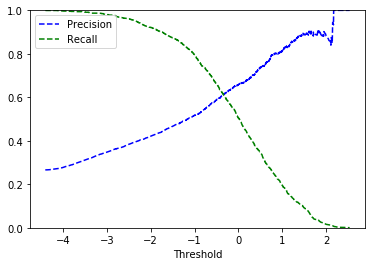

In [55]:
# plot the precision recall curve
def plot_precision_recall_vs_threshold(precisions, recalls,thresholds):
    plt.plot(thresholds, precisions[:-1],'b--',label= 'Precision')
    plt.plot(thresholds, recalls[:-1],'g--',label= 'Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions, recalls,thresholds)
plt.show()

Text(0, 0.5, 'Precision')

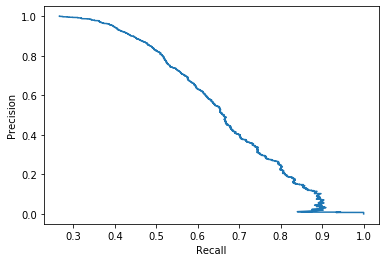

In [56]:
# better way to plot precision against recall
plt.plot(precisions, recalls)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [57]:
y_scores

array([ 0.44604596, -2.97266194, -0.46454255, ..., -0.24660832,
        0.65377926, -2.34552551])

In [58]:
# lets try by using new threshold.
y_scores=(y_scores> -.9)
print('The new precision is :',precision_score(y,y_scores)) 
print('The new recall is:', recall_score(y,y_scores))

The new precision is : 0.5253676470588236
The new recall is: 0.7645799892990904


## ROC Curve

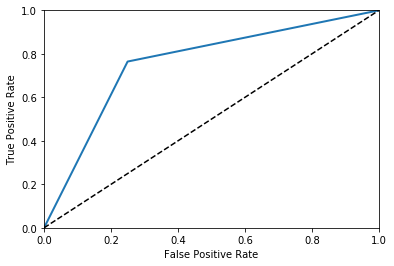

In [59]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y,y_scores)

def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

plot_roc_curve(fpr,tpr)
plt.show()